In [1]:
import pandas as pd
import numpy as np

In [306]:
train = pd.read_feather('input/train.feather')

In [275]:
train.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01,0.0
1,1,0,2016-01-01,0.0
2,2,0,2016-01-01,0.0
3,3,0,2016-01-01,0.0
4,4,0,2016-01-01,0.0


In [307]:
train['M'] = train.timestamp.dt.month
train['D'] = train.timestamp.dt.day
train['H'] = train.timestamp.dt.hour

In [37]:
M_table = train.set_index('timestamp').groupby(['meter','M']).meter_reading.mean().unstack(level=0).reset_index().set_index('M').rank()

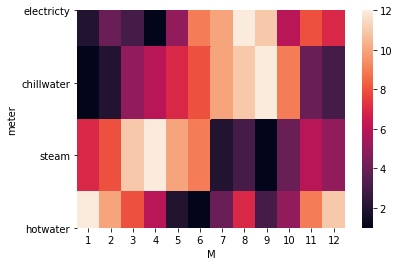

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.heatmap(M_table.T)
ax.set(yticklabels=['electricty','chillwater','steam','hotwater'])
plt.yticks(rotation=0)
plt.show()

In [53]:
H_table = train.set_index('timestamp').groupby(['meter','H']).meter_reading.mean().unstack(level=0).reset_index().set_index('H').rank()

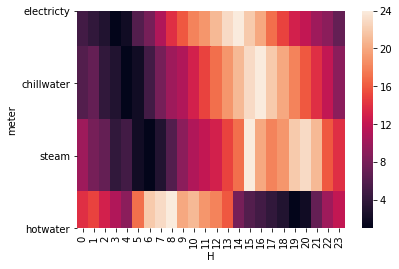

In [54]:
ax = sns.heatmap(H_table.T)
ax.set(yticklabels=['electricty','chillwater','steam','hotwater'])
plt.yticks(rotation=0)
plt.show()

In [57]:
D_table = train.set_index('timestamp').groupby(['meter','D']).meter_reading.mean().unstack(level=0).reset_index().set_index('D').rank()

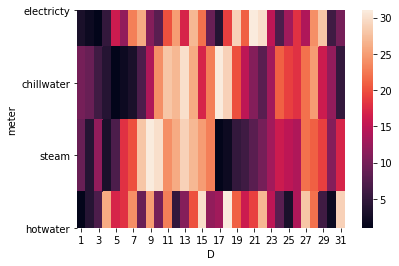

In [58]:
ax = sns.heatmap(D_table.T)
ax.set(yticklabels=['electricty','chillwater','steam','hotwater'])
plt.yticks(rotation=0)
plt.show()

In [79]:
M_D_table = train.set_index('timestamp').groupby(['meter','M','D']).meter_reading.mean().unstack(level=0).rank()#.iloc[:,0]#.unstack(level=0).reset_index()#.set_index('D').rank()

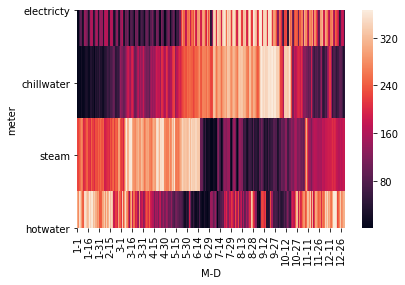

In [80]:
ax = sns.heatmap(M_D_table.T)
ax.set(yticklabels=['electricty','chillwater','steam','hotwater'])
plt.yticks(rotation=0)
plt.show()

In [90]:
a= train.set_index('timestamp').groupby(['meter','M','D']).meter_reading.mean().unstack(level=[0,1]).rank()#.plot()

Text(0.5, 1, 'Electricity')

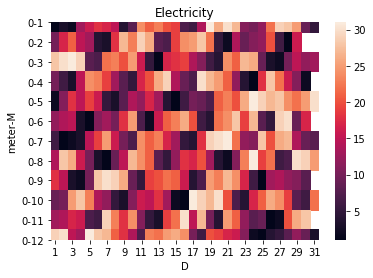

In [155]:
ax = sns.heatmap(a.iloc[:,:12].T)
ax.set_title('Electricity')

Text(0.5, 1, 'Chill water')

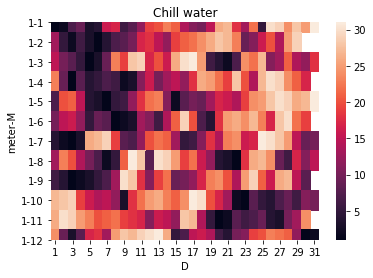

In [157]:
ax=sns.heatmap(a.iloc[:,12:24].T)
ax.set_title('Chill water')

Text(0.5, 1, 'Steam')

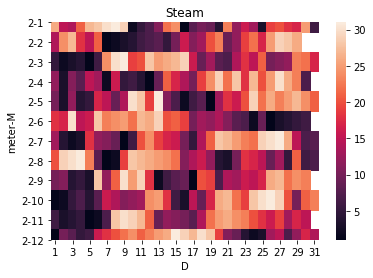

In [158]:
ax = sns.heatmap(a.iloc[:,24:36].T)
ax.set_title('Steam')

Text(0.5, 1, 'Hot water')

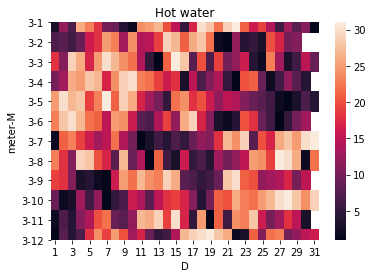

In [159]:
ax=sns.heatmap(a.iloc[:,36:49].T)
ax.set_title('Hot water')

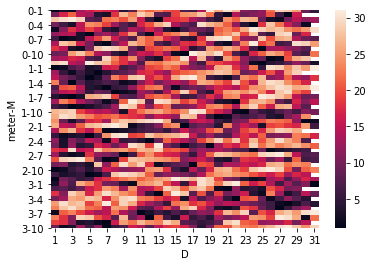

In [156]:
ax = sns.heatmap(a.T)

In [255]:
wtrain = pd.read_feather('input/weather_train.feather')

In [256]:
wtrain.head(1)

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01,25.0,6.0,20.0,NaN,1019.700012,0.0,0.0


In [308]:
wtrain['date'] = wtrain.timestamp.dt.date
table = wtrain[['site_id','timestamp','air_temperature','date']]

In [309]:
table = table.groupby(['site_id','date']).air_temperature.mean().reset_index()

In [310]:
table.head()

,site_id,date,air_temperature
0,0,2016-01-01,23.337500
1,0,2016-01-02,19.537500
2,0,2016-01-03,14.829166
3,0,2016-01-04,12.666667
4,0,2016-01-05,14.058333


## Cooling Degree Days // Heating Degree Days

In [311]:
bmeta = pd.read_feather('input/building_metadata.feather')

In [312]:
table['CDD'] = table.air_temperature - 18
table['HDD'] = 18 - table.air_temperature
table['CDD'] = np.clip(table['CDD'],a_min=0,a_max=None)
table['HDD'] = np.clip(table['HDD'],a_min=0,a_max=None)
train['date'] = train.timestamp.dt.date

In [313]:
train = train.merge(bmeta[['site_id','building_id','primary_use']],on=['building_id'],how='left')
train = train.merge(table[['site_id','date','CDD','HDD']],on=['site_id','date'],how='left')

In [314]:
train.head(1)

,building_id,meter,timestamp,meter_reading,M,D,H,date,site_id,primary_use,CDD,HDD
0,0,0,2016-01-01,0.0,1,1,0,2016-01-01,0,Education,5.3375,0.0


In [285]:
train.loc[train.meter==0][['meter_reading','HDD','CDD']].corr()

,meter_reading,HDD,CDD
meter_reading,1.000000,0.026812,0.023437
HDD,0.026812,1.000000,-0.494544
CDD,0.023437,-0.494544,1.000000


In [286]:
train.loc[train.meter==1][['meter_reading','HDD','CDD']].corr()

,meter_reading,HDD,CDD
meter_reading,1.000000,-0.034043,0.025776
HDD,-0.034043,1.000000,-0.501294
CDD,0.025776,-0.501294,1.000000


In [289]:
train.loc[train.meter==2][['meter_reading','HDD','CDD']].corr()

,meter_reading,HDD,CDD
meter_reading,1.000000,0.002767,-0.013781
HDD,0.002767,1.000000,-0.522974
CDD,-0.013781,-0.522974,1.000000


In [288]:
train.loc[train.meter==3][['meter_reading','HDD','CDD']].corr()

,meter_reading,HDD,CDD
meter_reading,1.000000,0.137058,-0.072703
HDD,0.137058,1.000000,-0.520906
CDD,-0.072703,-0.520906,1.000000


In [301]:
train.loc[train.meter==0].groupby('site_id')[['meter_reading','HDD','CDD']].corr().style.format("{:.2%}")

In [302]:
train.loc[train.meter==1].groupby('site_id')[['meter_reading','HDD','CDD']].corr().style.format("{:.2%}")

In [303]:
train.loc[train.meter==2].groupby('site_id')[['meter_reading','HDD','CDD']].corr().style.format("{:.2%}")

In [304]:
train.loc[train.meter==3].groupby('site_id')[['meter_reading','HDD','CDD']].corr().style.format("{:.2%}")

In [316]:
train.loc[train.meter==0].groupby('primary_use')[['meter_reading','HDD','CDD']].corr().style.format("{:.2%}")

In [317]:
train.loc[train.meter==1].groupby('primary_use')[['meter_reading','HDD','CDD']].corr().style.format("{:.2%}")

In [318]:
train.loc[train.meter==2].groupby('primary_use')[['meter_reading','HDD','CDD']].corr().style.format("{:.2%}")

In [319]:
train.loc[train.meter==3].groupby('primary_use')[['meter_reading','HDD','CDD']].corr().style.format("{:.2%}")